# Canadian Housing Crisis Analysis

## Overview
This project aims to analyze the housing crisis in Canada by exploring the relationship between house prices and the number of immigrants. The analysis is based on data obtained from the Government of Canada's open data portal, focusing on house prices and immigrant population statistics.

## Installation
To run this project, ensure you have Python and Jupyter Notebook installed on your system. You'll also need to install the following Python libraries:
- numpy
- pandas
- matplotlib
- seaborn
- plotly

You can install these libraries via pip:

```bash
pip install numpy pandas matplotlib seaborn plotly
```

## Usage
To use this project, follow these steps:
1. Clone this repository to your local machine.
2. Install the required dependencies as mentioned in the Installation section.
3. Open the Jupyter Notebook (or Python script) containing the analysis.
4. Execute the code cells to perform the analysis and visualize the results.

## Data
This analysis utilizes two datasets downloaded from Government of Canada's open data portal, related to the housing crisis in Canada. Please download the following datasets and place them in the appropriate directory:
1. **Immigrant Population Data**: The dataset containing information on the number of immigrants in various regions of Canada is also sourced from [immigrant-status-and-period-of-immigration-e](https://open.canada.ca/data/en/dataset/9adddd8a-e15b-497c-86af-641457a78bea/resource/255012de-7f8a-4f5e-b62a-bc438dc89543)
2. **House Prices Data**: The dataset containing information on house prices across different regions in Canada is sourced from [New housing price index, monthly](https://open.canada.ca/data/en/dataset/324befd1-893b-42e6-bece-6d30af3dd9f1)

## Analysis
The analysis includes the following steps:
- Data preprocessing
- Exploratory data analysis
- Statistical analysis

## Results
The key findings from the analysis will be summarized here.

## Future Work
Potential future enhancements or additional analyses for this project may include:
- Incorporating more datasets for a comprehensive analysis
- Building predictive models to forecast housing trends
- Exploring policy recommendations to address the housing crisis

## Contributors
- Muhammad Hunain Muneer

## License
MIT License

## Contact
For questions, feedback, or contributions, please contact hunain.muneer1995@gmail.com


### In order to conduct the analysis, the immigration data and housing data is downloaded via offical websites. 
### NOTE: 
 The immigration data contains 3 time bins i.e 'Before 1996', '1996 to 2005' and '2006 to 2011' -  To analyze the trends the data needs to be normalized. Housing data conatins information on per month basis so the immigration data has be to converted into similar format. The first bin i.e. 'Before 1996' does not have a start date; I followed up with the official about the start date and they responded the start date is not avaialble. Quote: "For the start year for Before 1996, this is every person in Canada aged 15 years or over and who was still living during that Census in 2011 and immigrated before 1996. So it would go back a long time, some people could have been in their 100s when they filled this and came to Canada a very long time ago when they were children."

# Lets begin the analysis

### Loading the data to pandas Data Frames

In [186]:
### Importing the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import os

In [187]:
# Loading the housing data

# Construct the file path relative to the notebook's directory
file_path = os.path.abspath("../data/raw/housing-index/18100205.csv")

try:
    housing_data = pd.read_csv(file_path)
    # Proceed with further processing of the dataframe
except FileNotFoundError:
    print("Error: File not found. Please ensure the file path is correct.")

#checking the first few rows of the data
housing_data.head()

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-01,Canada,2016A000011124,Total (house and land),"Index, 201612=100",347,units,0,v111955442,1.1,38.2,NaN,NaN,NaN,1
1,1981-01,Canada,2016A000011124,House only,"Index, 201612=100",347,units,0,v111955443,1.2,36.1,NaN,NaN,NaN,1
2,1981-01,Canada,2016A000011124,Land only,"Index, 201612=100",347,units,0,v111955444,1.3,40.6,E,NaN,NaN,1
3,1981-01,Atlantic Region,2016A00011,Total (house and land),"Index, 201612=100",347,units,0,v111955445,2.1,NaN,..,NaN,NaN,1
4,1981-01,Atlantic Region,2016A00011,House only,"Index, 201612=100",347,units,0,v111955446,2.2,NaN,..,NaN,NaN,1


In [188]:
# Loading the immigration data

# Construct the file path relative to the notebook's directory
file_path_immigration = os.path.abspath("../data/raw/immigrant.csv")

try:
    immigration_data = pd.read_csv(file_path_immigration, encoding='latin1')
    # Proceed with further processing of the dataframes
except FileNotFoundError:
    print("Error: File not found. Please ensure the file paths are correct.")

#checking the first few rows of the data
immigration_data.head()

,"Table Title: Immigrant Status and Period of Immigration (6) for the Population Aged 15 Years and Over, in Private Households of Canada, Provinces, Territories and 11 selected Census Metropolitan Areas (CMA) (25), 2011 National Household Survey, Statistics Canada",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Immigrant status and period of immigration,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia / Nouvelle-Écosse,New Brunswick / Nouveau-Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,...,Halifax CMA,Québec City CMA,Montréal CMA,Ottawa - Gatineau CMA,Toronto CMA,Winnipeg CMA,Regina CMA,Calgary CMA,Edmonton CMA,Vancouver CMA
1,Total - Immigrant status and period of immigra...,27259525,431045,114195,768060,622440,6474590,10473665,946940,812505,...,325050,634200,3120060,1005005,4546140,590295,170070,976570,935285,1926230
2,Non-immigrants,20543700,421170,107085,717140,593840,5511745,6912395,774365,744685,...,292010,602990,2278110,773525,2047970,451125,149025,665410,698240,1009070
3,Immigrants,6398855,8315,6415,44660,25890,902990,3442895,165005,60500,...,28685,28605,789440,220640,2416425,133380,19055,290760,216460,870035
4,Before 1996,3837770,5415,3455,28690,16530,496790,2148600,90000,29120,...,16775,11985,439575,130700,1408665,74005,9415,145920,123735,486590


In [189]:
# The housing dataframe is loaded as eaxpected but the immigration dataset has to be transformed

# Converting data form horizontal view to vertical view so all the areas are in the same column
immigration_data = immigration_data.transpose()
immigration_data.head()

,0,1,2,3,4,5,6
"Table Title: Immigrant Status and Period of Immigration (6) for the Population Aged 15 Years and Over, in Private Households of Canada, Provinces, Territories and 11 selected Census Metropolitan Areas (CMA) (25), 2011 National Household Survey, Statistics Canada",Immigrant status and period of immigration,Total - Immigrant status and period of immigra...,Non-immigrants,Immigrants,Before 1996,1996 to 2005,2006 to 2011
Unnamed: 1,Canada,27259525,20543700,6398855,3837770,1620885,940195
Unnamed: 2,Newfoundland and Labrador,431045,421170,8315,5415,1215,1690
Unnamed: 3,Prince Edward Island,114195,107085,6415,3455,920,2035
Unnamed: 4,Nova Scotia / Nouvelle-Écosse,768060,717140,44660,28690,7485,8485


In [190]:
# The index is not correct so we will drop it from the dataset

immigration_data.reset_index(drop= True, inplace= True)
immigration_data.head(11)

,0,1,2,3,4,5,6
0,Immigrant status and period of immigration,Total - Immigrant status and period of immigra...,Non-immigrants,Immigrants,Before 1996,1996 to 2005,2006 to 2011
1,Canada,27259525,20543700,6398855,3837770,1620885,940195
2,Newfoundland and Labrador,431045,421170,8315,5415,1215,1690
3,Prince Edward Island,114195,107085,6415,3455,920,2035
4,Nova Scotia / Nouvelle-Écosse,768060,717140,44660,28690,7485,8485
5,New Brunswick / Nouveau-Brunswick,622440,593840,25890,16530,3970,5395
6,Quebec,6474590,5511745,902990,496790,227160,179040
7,Ontario,10473665,6912395,3442895,2148600,884025,410270
8,Manitoba,946940,774365,165005,90000,31800,43205
9,Saskatchewan,812505,744685,60500,29120,11165,20215


In [191]:
# Setting the frist row as the columns of the dataframe

immigration_data.columns = immigration_data.iloc[0]
immigration_data.head()

,Immigrant status and period of immigration,Total - Immigrant status and period of immigration,Non-immigrants,Immigrants,Before 1996,1996 to 2005,2006 to 2011
0,Immigrant status and period of immigration,Total - Immigrant status and period of immigra...,Non-immigrants,Immigrants,Before 1996,1996 to 2005,2006 to 2011
1,Canada,27259525,20543700,6398855,3837770,1620885,940195
2,Newfoundland and Labrador,431045,421170,8315,5415,1215,1690
3,Prince Edward Island,114195,107085,6415,3455,920,2035
4,Nova Scotia / Nouvelle-Écosse,768060,717140,44660,28690,7485,8485


In [192]:
# Removing the first row from the dataset since we have that as our columns

immigration_data = immigration_data.iloc[1:]
immigration_data.head()

,Immigrant status and period of immigration,Total - Immigrant status and period of immigration,Non-immigrants,Immigrants,Before 1996,1996 to 2005,2006 to 2011
1,Canada,27259525,20543700,6398855,3837770,1620885,940195
2,Newfoundland and Labrador,431045,421170,8315,5415,1215,1690
3,Prince Edward Island,114195,107085,6415,3455,920,2035
4,Nova Scotia / Nouvelle-Écosse,768060,717140,44660,28690,7485,8485
5,New Brunswick / Nouveau-Brunswick,622440,593840,25890,16530,3970,5395


In [193]:
# We will now change the names of our columns that are more readable and understandable

immigration_data = immigration_data.rename(columns = {'Immigrant status and period of immigration' : 'GEO', 'Total - Immigrant status and period of immigration': 'Total'})
immigration_data.head()

,GEO,Total,Non-immigrants,Immigrants,Before 1996,1996 to 2005,2006 to 2011
1,Canada,27259525,20543700,6398855,3837770,1620885,940195
2,Newfoundland and Labrador,431045,421170,8315,5415,1215,1690
3,Prince Edward Island,114195,107085,6415,3455,920,2035
4,Nova Scotia / Nouvelle-Écosse,768060,717140,44660,28690,7485,8485
5,New Brunswick / Nouveau-Brunswick,622440,593840,25890,16530,3970,5395


In [194]:
# We will check the column names for any leading or trailing spaces - Important as we want to access them

immigration_data.columns

Index(['GEO', 'Total', '  Non-immigrants', '  Immigrants', '    Before 1996',
       '    1996 to 2005', '    2006 to 2011'],
      dtype='object', name=0)

In [195]:
# Note that immigration data has issues with extra spaces whereas, the housing data columns are fine

# Removing extra spaces from the column's name for immigration data
immigration_data.columns = immigration_data.columns.str.strip()
immigration_data.columns

Index(['GEO', 'Total', 'Non-immigrants', 'Immigrants', 'Before 1996',
       '1996 to 2005', '2006 to 2011'],
      dtype='object', name=0)

In [196]:
# converting the data types 
cols_to_convert = ['Total', 'Non-immigrants', 'Immigrants', 'Before 1996','1996 to 2005','2006 to 2011']

immigration_data[cols_to_convert] = immigration_data[cols_to_convert].apply(pd.to_numeric)
immigration_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO             25 non-null     object
 1   Total           25 non-null     int64 
 2   Non-immigrants  25 non-null     int64 
 3   Immigrants      25 non-null     int64 
 4   Before 1996     25 non-null     int64 
 5   1996 to 2005    25 non-null     int64 
 6   2006 to 2011    25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [197]:
# ates are in wide format and needs to be changed into long format
# We will add a single column for the dates and their corresponding value will be in a new column i.e. "New Immigrants"

immigration_data = pd.melt(immigration_data, id_vars= ['GEO', 'Total', 'Non-immigrants', 'Immigrants'], value_vars = ['Before 1996','1996 to 2005', '2006 to 2011'], var_name= 'Bin', 
             value_name='New Immigrants Monthly')

In [198]:
immigration_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   GEO                     75 non-null     object
 1   Total                   75 non-null     int64 
 2   Non-immigrants          75 non-null     int64 
 3   Immigrants              75 non-null     int64 
 4   Bin                     75 non-null     object
 5   New Immigrants Monthly  75 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.6+ KB


In [199]:
immigration_data.head()

,GEO,Total,Non-immigrants,Immigrants,Bin,New Immigrants Monthly
0,Canada,27259525,20543700,6398855,Before 1996,3837770
1,Newfoundland and Labrador,431045,421170,8315,Before 1996,5415
2,Prince Edward Island,114195,107085,6415,Before 1996,3455
3,Nova Scotia / Nouvelle-Écosse,768060,717140,44660,Before 1996,28690
4,New Brunswick / Nouveau-Brunswick,622440,593840,25890,Before 1996,16530


In [200]:
date_range = pd.date_range(start='1995-12-01', end='2011-12-01', freq='MS')

areas = ['Canada', 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick',  'Quebec',
            'Ontario', 'Manitoba','Saskatchewan', 'Alberta', 'British Columbia' ]

canada_provinces = []

for date in date_range:
    for area in areas:
        canada_provinces.append(area)

df = pd.DataFrame({
    'GEO': canada_provinces,
    'Date': date_range.repeat(len(areas))
})

df.head()

,GEO,Date
0,Canada,1995-12-01
1,Newfoundland and Labrador,1995-12-01
2,Prince Edward Island,1995-12-01
3,Nova Scotia,1995-12-01
4,New Brunswick,1995-12-01


In [201]:
# Removing the French names for the provinces and any extra spaces

immigration_data['GEO'] = immigration_data['GEO'].str.split('/').str[0].str.strip()
immigration_data['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon',
       'Northwest Territories', 'Nunavut', "St. John's CMA",
       'Halifax CMA', 'Québec City CMA', 'Montréal CMA',
       'Ottawa - Gatineau CMA', 'Toronto CMA', 'Winnipeg CMA',
       'Regina CMA', 'Calgary CMA', 'Edmonton CMA', 'Vancouver CMA'],
      dtype=object)

In [202]:
# merging the df with the original immigration data in order to get the date column

immigration_data = pd.merge(df, immigration_data, on=['GEO'], how='left')
immigration_data.head()

,GEO,Date,Total,Non-immigrants,Immigrants,Bin,New Immigrants Monthly
0,Canada,1995-12-01,27259525,20543700,6398855,Before 1996,3837770
1,Canada,1995-12-01,27259525,20543700,6398855,1996 to 2005,1620885
2,Canada,1995-12-01,27259525,20543700,6398855,2006 to 2011,940195
3,Newfoundland and Labrador,1995-12-01,431045,421170,8315,Before 1996,5415
4,Newfoundland and Labrador,1995-12-01,431045,421170,8315,1996 to 2005,1215


In [203]:
# immigration data uptil dec 1995

df1 = immigration_data[(immigration_data['Date'].dt.year == 1995) & (immigration_data['Bin'] == 'Before 1996')]

df1.head()

,GEO,Date,Total,Non-immigrants,Immigrants,Bin,New Immigrants Monthly
0,Canada,1995-12-01,27259525,20543700,6398855,Before 1996,3837770
3,Newfoundland and Labrador,1995-12-01,431045,421170,8315,Before 1996,5415
6,Prince Edward Island,1995-12-01,114195,107085,6415,Before 1996,3455
9,Nova Scotia,1995-12-01,768060,717140,44660,Before 1996,28690
12,New Brunswick,1995-12-01,622440,593840,25890,Before 1996,16530


In [204]:
# the immigration data has to match with the bin and date

# filtering the data with the Date matches with the Bin i.e. '1996 to 2005'
df2 = immigration_data[(immigration_data['Date'].dt.year >= 1996) & (immigration_data['Date'].dt.year <= 2005) & (immigration_data['Bin'] == '1996 to 2005')]

df2.head()

,GEO,Date,Total,Non-immigrants,Immigrants,Bin,New Immigrants Monthly
34,Canada,1996-01-01,27259525,20543700,6398855,1996 to 2005,1620885
37,Newfoundland and Labrador,1996-01-01,431045,421170,8315,1996 to 2005,1215
40,Prince Edward Island,1996-01-01,114195,107085,6415,1996 to 2005,920
43,Nova Scotia,1996-01-01,768060,717140,44660,1996 to 2005,7485
46,New Brunswick,1996-01-01,622440,593840,25890,1996 to 2005,3970


In [205]:
# Repeating the same process for the other bin

# filtering the data with the Date matches with the Bin i.e. '2006 to 2011'
df3 = immigration_data[(immigration_data['Date'].dt.year >= 2006) & (immigration_data['Date'].dt.year <= 2011) & (immigration_data['Bin'] == '2006 to 2011')]

df3.head()

,GEO,Date,Total,Non-immigrants,Immigrants,Bin,New Immigrants Monthly
3995,Canada,2006-01-01,27259525,20543700,6398855,2006 to 2011,940195
3998,Newfoundland and Labrador,2006-01-01,431045,421170,8315,2006 to 2011,1690
4001,Prince Edward Island,2006-01-01,114195,107085,6415,2006 to 2011,2035
4004,Nova Scotia,2006-01-01,768060,717140,44660,2006 to 2011,8485
4007,New Brunswick,2006-01-01,622440,593840,25890,2006 to 2011,5395


### In 3 time bins, we can not normalize the number of immigrants in 'Before 1996' bin since there is no start date

### Normalizing other two time bins i.e. ('1996-2005' & '2006-2011')

In [206]:
# Normalizing the 'New Immigrants' column so we get average number of immigrants per month for '1996 -2005'

# number of months in 1996 - 2005 (10 years)
num_months_1 = 10 * 12

df2.loc[: ,'New Immigrants Monthly'] = (df2['New Immigrants Monthly'] / num_months_1).round().astype(int)
df2.head()

,GEO,Date,Total,Non-immigrants,Immigrants,Bin,New Immigrants Monthly
34,Canada,1996-01-01,27259525,20543700,6398855,1996 to 2005,13507
37,Newfoundland and Labrador,1996-01-01,431045,421170,8315,1996 to 2005,10
40,Prince Edward Island,1996-01-01,114195,107085,6415,1996 to 2005,8
43,Nova Scotia,1996-01-01,768060,717140,44660,1996 to 2005,62
46,New Brunswick,1996-01-01,622440,593840,25890,1996 to 2005,33


In [207]:
# Normalizing the 'New Immigrants' column so we get average number of immigrants per month for '2006-2011'

# number of months in 2006 - 2011 (6 years)
num_months_2 = 12 * 6

df3.loc[: ,'New Immigrants Monthly'] = (df3['New Immigrants Monthly'] / num_months_2).round().astype(int)
df3.head()

,GEO,Date,Total,Non-immigrants,Immigrants,Bin,New Immigrants Monthly
3995,Canada,2006-01-01,27259525,20543700,6398855,2006 to 2011,13058
3998,Newfoundland and Labrador,2006-01-01,431045,421170,8315,2006 to 2011,23
4001,Prince Edward Island,2006-01-01,114195,107085,6415,2006 to 2011,28
4004,Nova Scotia,2006-01-01,768060,717140,44660,2006 to 2011,118
4007,New Brunswick,2006-01-01,622440,593840,25890,2006 to 2011,75


In [208]:
# Merging the datasets

immigration_data = pd.concat([df1, df2, df3], ignore_index=True)
immigration_data.head()

,GEO,Date,Total,Non-immigrants,Immigrants,Bin,New Immigrants Monthly
0,Canada,1995-12-01,27259525,20543700,6398855,Before 1996,3837770
1,Newfoundland and Labrador,1995-12-01,431045,421170,8315,Before 1996,5415
2,Prince Edward Island,1995-12-01,114195,107085,6415,Before 1996,3455
3,Nova Scotia,1995-12-01,768060,717140,44660,Before 1996,28690
4,New Brunswick,1995-12-01,622440,593840,25890,Before 1996,16530


In [209]:
immigration_data.shape

(2123, 7)

In [210]:
immigration_data['Number of Immigrants'] = immigration_data.groupby('GEO')['New Immigrants Monthly'].cumsum()
immigration_data.head()

,GEO,Date,Total,Non-immigrants,Immigrants,Bin,New Immigrants Monthly,Number of Immigrants
0,Canada,1995-12-01,27259525,20543700,6398855,Before 1996,3837770,3837770
1,Newfoundland and Labrador,1995-12-01,431045,421170,8315,Before 1996,5415,5415
2,Prince Edward Island,1995-12-01,114195,107085,6415,Before 1996,3455,3455
3,Nova Scotia,1995-12-01,768060,717140,44660,Before 1996,28690,28690
4,New Brunswick,1995-12-01,622440,593840,25890,Before 1996,16530,16530


In [211]:
immigration_data.tail(11)

,GEO,Date,Total,Non-immigrants,Immigrants,Bin,New Immigrants Monthly,Number of Immigrants
2112,Canada,2011-12-01,27259525,20543700,6398855,2006 to 2011,13058,6398786
2113,Newfoundland and Labrador,2011-12-01,431045,421170,8315,2006 to 2011,23,8271
2114,Prince Edward Island,2011-12-01,114195,107085,6415,2006 to 2011,28,6431
2115,Nova Scotia,2011-12-01,768060,717140,44660,2006 to 2011,118,44626
2116,New Brunswick,2011-12-01,622440,593840,25890,2006 to 2011,75,25890
2117,Quebec,2011-12-01,6474590,5511745,902990,2006 to 2011,2487,903014
2118,Ontario,2011-12-01,10473665,6912395,3442895,2006 to 2011,5698,3442896
2119,Manitoba,2011-12-01,946940,774365,165005,2006 to 2011,600,165000
2120,Saskatchewan,2011-12-01,812505,744685,60500,2006 to 2011,281,60512
2121,Alberta,2011-12-01,2888740,2239430,596100,2006 to 2011,1584,596153


In [212]:
# removing the columns that are not necessary for the analysis

col_imm = ['Total', 'Non-immigrants', 'Immigrants', 'New Immigrants Monthly']
immigration_data.drop(columns=col_imm, inplace=True)
immigration_data.head()

,GEO,Date,Bin,Number of Immigrants
0,Canada,1995-12-01,Before 1996,3837770
1,Newfoundland and Labrador,1995-12-01,Before 1996,5415
2,Prince Edward Island,1995-12-01,Before 1996,3455
3,Nova Scotia,1995-12-01,Before 1996,28690
4,New Brunswick,1995-12-01,Before 1996,16530


### Preprocessing Housing Data

In [213]:
# removing the columns that are not necessary for the analysis for housing data

h_cols_to_remove = ['DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR',
                     'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']
housing_data.drop(columns=h_cols_to_remove, inplace=True)
housing_data.head()

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,1981-01,Canada,Total (house and land),"Index, 201612=100",38.2
1,1981-01,Canada,House only,"Index, 201612=100",36.1
2,1981-01,Canada,Land only,"Index, 201612=100",40.6
3,1981-01,Atlantic Region,Total (house and land),"Index, 201612=100",NaN
4,1981-01,Atlantic Region,House only,"Index, 201612=100",NaN


In [214]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REF_DATE                   61920 non-null  object 
 1   GEO                        61920 non-null  object 
 2   New housing price indexes  61920 non-null  object 
 3   UOM                        61920 non-null  object 
 4   VALUE                      51094 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.4+ MB


In [215]:
# Converting the housing_data columns datatypes to ensure they are in the right format

housing_data['REF_DATE'] = pd.to_datetime(housing_data['REF_DATE'])

In [216]:
housing_data.head()

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,1981-01-01,Canada,Total (house and land),"Index, 201612=100",38.2
1,1981-01-01,Canada,House only,"Index, 201612=100",36.1
2,1981-01-01,Canada,Land only,"Index, 201612=100",40.6
3,1981-01-01,Atlantic Region,Total (house and land),"Index, 201612=100",NaN
4,1981-01-01,Atlantic Region,House only,"Index, 201612=100",NaN


In [217]:
# We only want to analyse the trend of House prices
# Keeping only the values for New housing price indexes	for "House only"

house_only = housing_data[housing_data['New housing price indexes'] == 'House only']
house_only.reset_index(drop=True, inplace=True)
house_only.head(12)


,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,1981-01-01,Canada,House only,"Index, 201612=100",36.1
1,1981-01-01,Atlantic Region,House only,"Index, 201612=100",NaN
2,1981-01-01,Newfoundland and Labrador,House only,"Index, 201612=100",NaN
3,1981-01-01,"St. John's, Newfoundland and Labrador",House only,"Index, 201612=100",37.5
4,1981-01-01,Prince Edward Island,House only,"Index, 201612=100",NaN
5,1981-01-01,"Charlottetown, Prince Edward Island",House only,"Index, 201612=100",NaN
6,1981-01-01,Nova Scotia,House only,"Index, 201612=100",NaN
7,1981-01-01,"Halifax, Nova Scotia",House only,"Index, 201612=100",NaN
8,1981-01-01,New Brunswick,House only,"Index, 201612=100",NaN
9,1981-01-01,"Saint John, Fredericton, and Moncton, New Brun...",House only,"Index, 201612=100",61.4


# Merge

### Both datasets (House prices and Immigration) have been preprocessed and are ready to merge

In [218]:
housing_immigration_data = pd.merge(house_only, immigration_data, left_on=['REF_DATE', 'GEO'], right_on=['Date', 'GEO'], how='inner')
housing_immigration_data.head(22)

,REF_DATE,GEO,New housing price indexes,UOM,VALUE,Date,Bin,Number of Immigrants
0,1995-12-01,Canada,House only,"Index, 201612=100",51.3,1995-12-01,Before 1996,3837770
1,1995-12-01,Newfoundland and Labrador,House only,"Index, 201612=100",51.3,1995-12-01,Before 1996,5415
2,1995-12-01,Prince Edward Island,House only,"Index, 201612=100",88.5,1995-12-01,Before 1996,3455
3,1995-12-01,Nova Scotia,House only,"Index, 201612=100",60.3,1995-12-01,Before 1996,28690
4,1995-12-01,New Brunswick,House only,"Index, 201612=100",84.0,1995-12-01,Before 1996,16530
5,1995-12-01,Quebec,House only,"Index, 201612=100",55.6,1995-12-01,Before 1996,496790
6,1995-12-01,Ontario,House only,"Index, 201612=100",44.6,1995-12-01,Before 1996,2148600
7,1995-12-01,Manitoba,House only,"Index, 201612=100",45.5,1995-12-01,Before 1996,90000
8,1995-12-01,Saskatchewan,House only,"Index, 201612=100",38.2,1995-12-01,Before 1996,29120
9,1995-12-01,Alberta,House only,"Index, 201612=100",39.0,1995-12-01,Before 1996,322145


In [219]:
# dropping the duplicate data columns

housing_immigration_data.drop(columns='REF_DATE', inplace=True)

In [220]:
new_order = ['Date', 'Bin', 'GEO', 'UOM', 'New housing price indexes', 'VALUE', 'Number of Immigrants']
housing_immigration_data = housing_immigration_data.reindex(columns=new_order)
housing_immigration_data.head(22)

,Date,Bin,GEO,UOM,New housing price indexes,VALUE,Number of Immigrants
0,1995-12-01,Before 1996,Canada,"Index, 201612=100",House only,51.3,3837770
1,1995-12-01,Before 1996,Newfoundland and Labrador,"Index, 201612=100",House only,51.3,5415
2,1995-12-01,Before 1996,Prince Edward Island,"Index, 201612=100",House only,88.5,3455
3,1995-12-01,Before 1996,Nova Scotia,"Index, 201612=100",House only,60.3,28690
4,1995-12-01,Before 1996,New Brunswick,"Index, 201612=100",House only,84.0,16530
5,1995-12-01,Before 1996,Quebec,"Index, 201612=100",House only,55.6,496790
6,1995-12-01,Before 1996,Ontario,"Index, 201612=100",House only,44.6,2148600
7,1995-12-01,Before 1996,Manitoba,"Index, 201612=100",House only,45.5,90000
8,1995-12-01,Before 1996,Saskatchewan,"Index, 201612=100",House only,38.2,29120
9,1995-12-01,Before 1996,Alberta,"Index, 201612=100",House only,39.0,322145


In [221]:
housing_immigration_data.tail(11)

,Date,Bin,GEO,UOM,New housing price indexes,VALUE,Number of Immigrants
2112,2011-12-01,2006 to 2011,Canada,"Index, 201612=100",House only,89.3,6398786
2113,2011-12-01,2006 to 2011,Newfoundland and Labrador,"Index, 201612=100",House only,97.5,8271
2114,2011-12-01,2006 to 2011,Prince Edward Island,"Index, 201612=100",House only,102.2,6431
2115,2011-12-01,2006 to 2011,Nova Scotia,"Index, 201612=100",House only,93.1,44626
2116,2011-12-01,2006 to 2011,New Brunswick,"Index, 201612=100",House only,98.7,25890
2117,2011-12-01,2006 to 2011,Quebec,"Index, 201612=100",House only,96.6,903014
2118,2011-12-01,2006 to 2011,Ontario,"Index, 201612=100",House only,82.5,3442896
2119,2011-12-01,2006 to 2011,Manitoba,"Index, 201612=100",House only,88.0,165000
2120,2011-12-01,2006 to 2011,Saskatchewan,"Index, 201612=100",House only,99.3,60512
2121,2011-12-01,2006 to 2011,Alberta,"Index, 201612=100",House only,93.2,596153


In [222]:
# Checking missing values

housing_immigration_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       2123 non-null   datetime64[ns]
 1   Bin                        2123 non-null   object        
 2   GEO                        2123 non-null   object        
 3   UOM                        2123 non-null   object        
 4   New housing price indexes  2123 non-null   object        
 5   VALUE                      2123 non-null   float64       
 6   Number of Immigrants       2123 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 116.2+ KB


# EDA

### Plot for Canada only

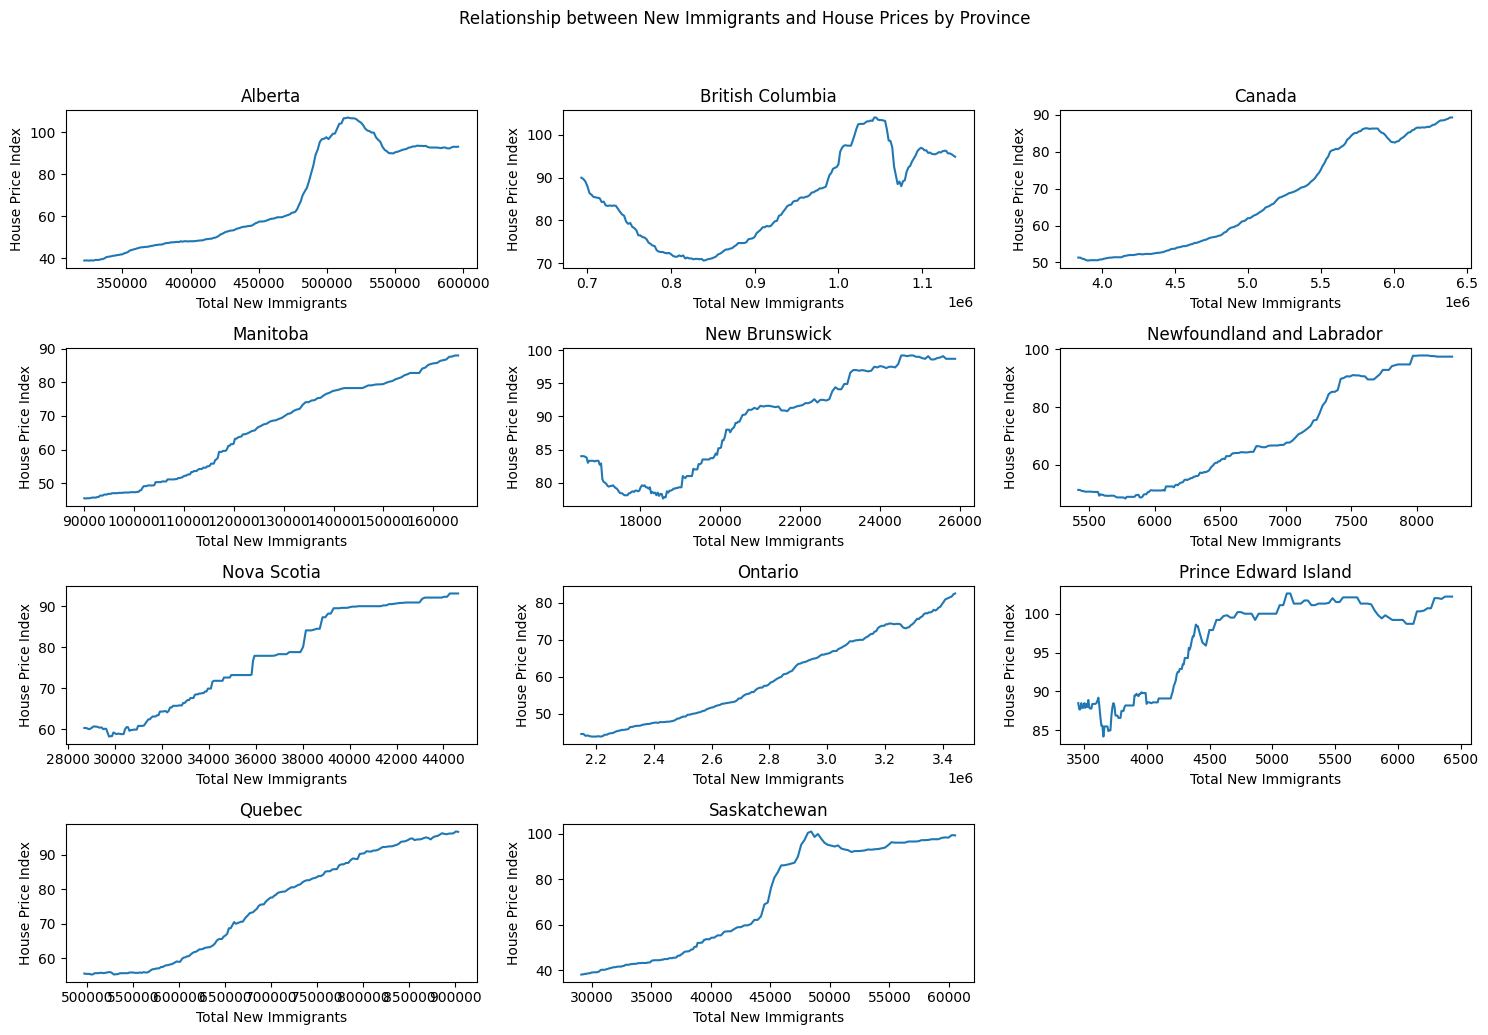

In [223]:
# Grouping data by province
province_groups = housing_immigration_data.groupby('GEO')

# Determining the number of rows and columns for subplots
num_provinces = len(province_groups)
num_cols = 3  # Adjust the number of columns as needed
num_rows = (num_provinces - 1) // num_cols + 1

# Creating subplots for each province
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Adjust size as needed
for (province, group), ax in zip(province_groups, axes.flatten()):
    ax.plot(group['Number of Immigrants'], group['VALUE'])
    ax.set_title(province)
    ax.set_xlabel('Total New Immigrants')
    ax.set_ylabel('House Price Index')

# Hide any unused subplots
for i in range(num_provinces, num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.suptitle('Relationship between New Immigrants and House Prices by Province', y=1.03)
plt.tight_layout()
plt.show()


### Plot for all provinces and canada (House price vs Number of Immigrants)

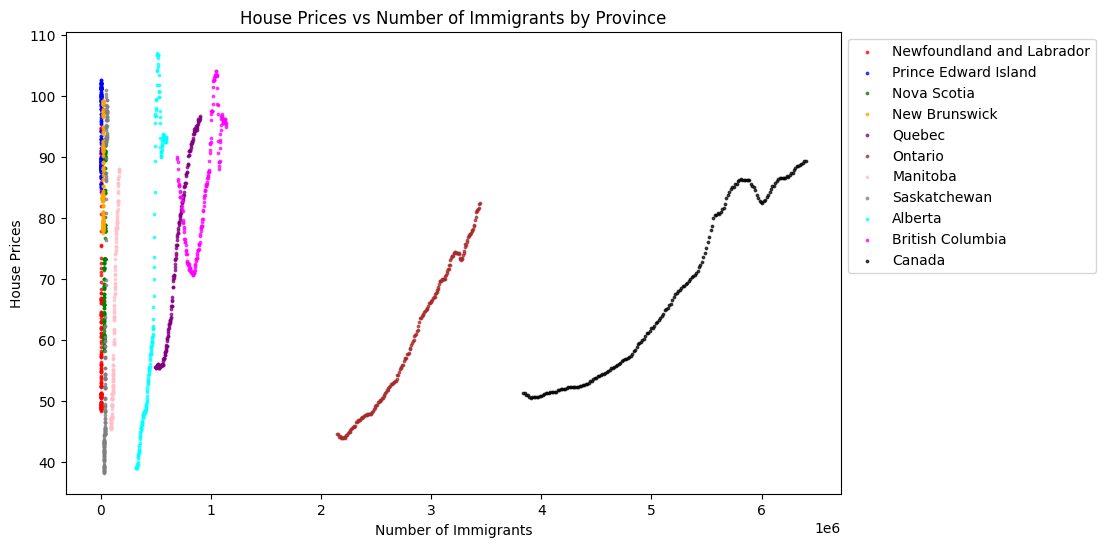

In [224]:
# Define colors for each province
colors = {
    'Newfoundland and Labrador': 'red',
    'Prince Edward Island': 'blue',
    'Nova Scotia': 'green',
    'New Brunswick': 'orange',
    'Quebec': 'purple',
    'Ontario': 'brown',
    'Manitoba': 'pink',
    'Saskatchewan': 'gray',
    'Alberta': 'cyan',
    'British Columbia': 'magenta',
    'Canada': 'black'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))
for province in colors:
    province_data = housing_immigration_data[housing_immigration_data['GEO'] == province]
    plt.scatter(province_data['Number of Immigrants'], province_data['VALUE'], label=province, color=colors[province], alpha=0.7, s= 3)

# Add labels and title
plt.title('House Prices vs Number of Immigrants by Province')
plt.xlabel('Number of Immigrants')
plt.ylabel('House Prices')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the position of the legend as needed

# Show plot
plt.grid(False)
plt.show()

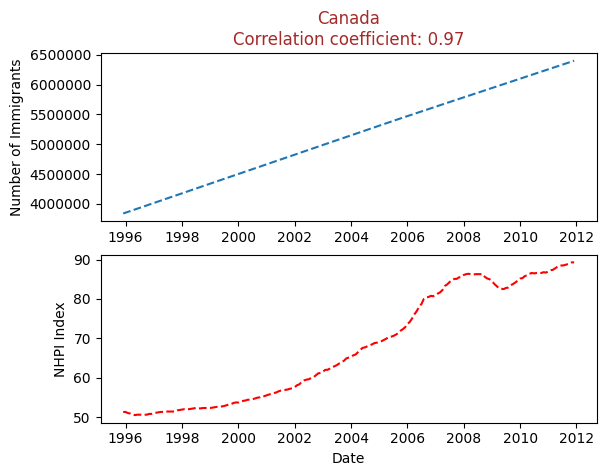

In [285]:
import matplotlib.pyplot as plt

# Filter data for Canada
df1 = housing_immigration_data[housing_immigration_data['GEO'] == 'Canada']
correlation = df1['Number of Immigrants'].corr(df1['VALUE'])

# Create the plot
plt.subplot(2, 1, 1)
plt.plot(df1['Date'], df1['Number of Immigrants'], '--', label='Number of Immigrants')
plt.title('Canada\nCorrelation coefficient: {:.2f}'.format(correlation), fontsize=12, color='brown')
plt.ylabel('Number of Immigrants')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(2, 1, 2)
plt.plot(df1['Date'], df1['VALUE'], '--', color='red', label='NHPI Index')
plt.xlabel('Date')
plt.ylabel('NHPI Index')

plt.show()


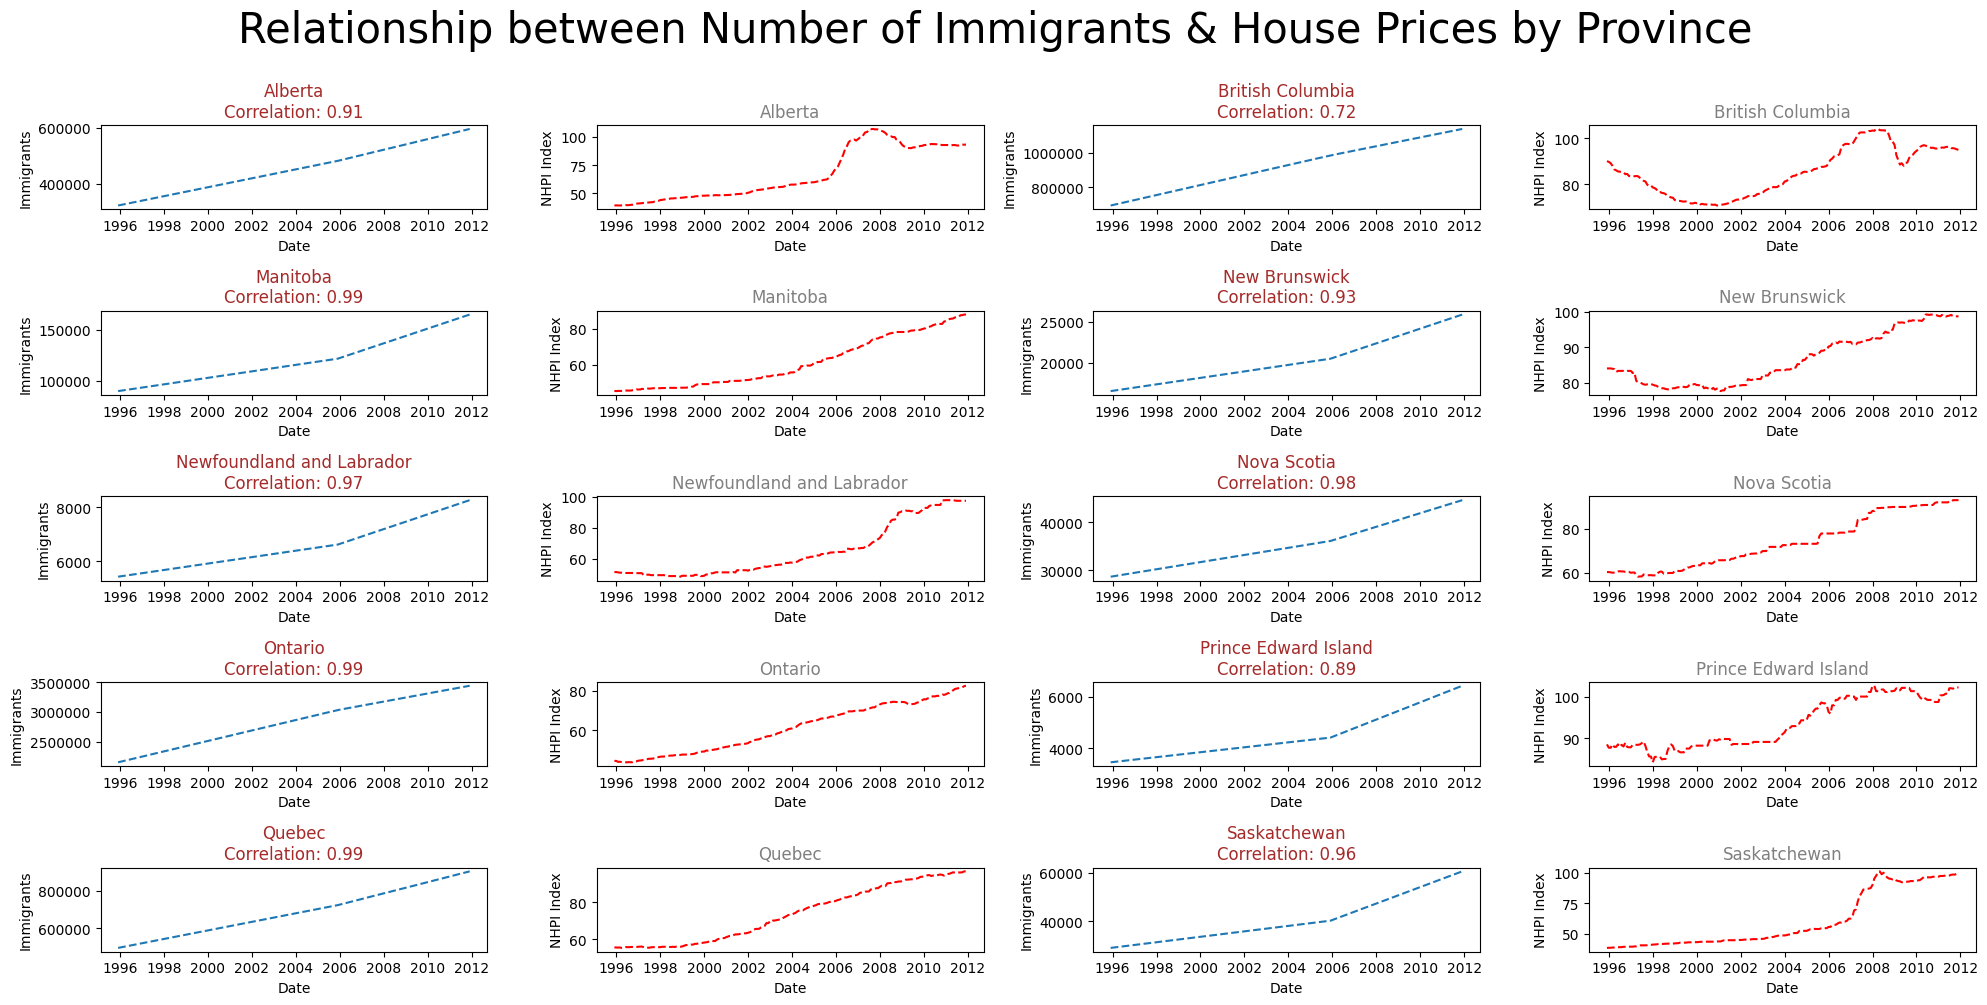

In [309]:
import matplotlib.pyplot as plt

# Grouping data by province, excluding Canada
province_groups = housing_immigration_data[housing_immigration_data['GEO'] != 'Canada'].groupby('GEO')

# Determining the number of rows and columns for subplots
num_provinces = len(province_groups)
num_cols = 4  # Adjust the number of columns as needed
num_rows = (num_provinces - 1) // (num_cols // 2) + 1

# Creating subplots for each province
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust size as needed
for i, ((province, group), ax) in enumerate(zip(province_groups, axes.flatten()), 1):
    # Filter data for the province
    df_province = housing_immigration_data[housing_immigration_data['GEO'] == province]
    
    # Calculate correlation coefficient
    correlation = df_province['Number of Immigrants'].corr(df_province['VALUE'])
                    
    # Plotting
    plt.subplot(num_rows, num_cols, 2*i-1)
    plt.plot(df_province['Date'], df_province['Number of Immigrants'], '--', label='Number of Immigrants')
    plt.title(f'{province}\nCorrelation: {correlation:.2f}', fontsize=12, color='brown')
    
    plt.xlabel('Date')
    plt.ylabel('Immigrants')
    plt.ticklabel_format(style='plain', axis='y')
    #plt.legend(loc='upper right')
                    
    plt.subplot(num_rows, num_cols, 2*i)
    plt.plot(df_province['Date'], df_province['VALUE'], '--', color='red', label='NHPI Index')
    plt.title(f'{province}', fontsize=12, color='gray')

    plt.xlabel('Date')
    plt.ylabel('NHPI Index')
    plt.ticklabel_format(style='plain', axis='y')
    #plt.legend(loc='upper right')

plt.suptitle('Relationship between Number of Immigrants & House Prices by Province', y= 1.001, fontsize=30)
plt.tight_layout()
plt.show()
